It's time to revisit your classifier from the previous assignment. Using the evaluation techniques we've covered here, look at your classifier's performance in more detail. Then go back and iterate by engineering new features, removing poor features, or tuning parameters. Repeat this process until you have five different versions of your classifier. Once you've iterated, answer these questions to compare the performance of each:

<ul>
    <li>Do any of your classifiers seem to overfit?</li>
    <li>Which seem to perform the best? Why?</li>
    <li>Which features seemed to be most impactful to performance?</li>
</ul>
Write up your iterations and answers to the above questions in a few pages. Submit a link below and go over it with your mentor to see if they have any other ideas on how you could improve your classifier's performance.

In [32]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
yelp_raw = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', delimiter= '\t', header=None)
yelp_raw.columns = ['text', 'sentiment']

In [34]:
print(yelp_raw)

                                                  text  sentiment
0                             Wow... Loved this place.          1
1                                   Crust is not good.          0
2            Not tasty and the texture was just nasty.          0
3    Stopped by during the late May bank holiday of...          1
4    The selection on the menu was great and so wer...          1
5       Now I am getting angry and I want my damn pho.          0
6                Honeslty it didn't taste THAT fresh.)          0
7    The potatoes were like rubber and you could te...          0
8                            The fries were great too.          1
9                                       A great touch.          1
10                            Service was very prompt.          1
11                                  Would not go back.          0
12   The cashier had no care what so ever on what I...          0
13   I tried the Cape Cod ravoli, chicken,with cran...          1
14   I was

In [35]:
yelp_neg = yelp_raw[yelp_raw['sentiment'] == 0]
yelp_neg.head()

,text,sentiment
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0


In [59]:
Counter(" ".join(yelp_neg["text"]).split()).most_common(100)

[('the', 191),
 ('I', 181),
 ('and', 160),
 ('was', 155),
 ('to', 129),
 ('a', 121),
 ('not', 87),
 ('The', 82),
 ('of', 72),
 ('is', 67),
 ('for', 62),
 ('this', 48),
 ('it', 47),
 ('in', 44),
 ('be', 44),
 ('food', 43),
 ('that', 41),
 ('at', 38),
 ('place', 37),
 ('but', 36),
 ('had', 31),
 ('with', 30),
 ('my', 29),
 ('like', 29),
 ('so', 29),
 ('have', 28),
 ('were', 27),
 ('are', 26),
 ('go', 25),
 ('we', 25),
 ('you', 22),
 ('service', 22),
 ('on', 21),
 ('It', 21),
 ('very', 21),
 ('We', 20),
 ('back', 20),
 ('they', 19),
 ('would', 19),
 ("don't", 19),
 ('no', 18),
 ('our', 18),
 ('here', 18),
 ('This', 17),
 ('will', 17),
 ('time', 16),
 ('from', 16),
 ('just', 15),
 ('never', 15),
 ('much', 15),
 ('got', 15),
 ('as', 15),
 ('there', 15),
 ('your', 14),
 ('an', 14),
 ('only', 14),
 ('good', 14),
 ('minutes', 14),
 ('been', 13),
 ('up', 13),
 ('being', 13),
 ('back.', 13),
 ('ever', 13),
 ('did', 13),
 ('out', 13),
 ('think', 13),
 ('going', 13),
 ("wasn't", 13),
 ("I've", 13)

In [60]:
# Bad review keywords chosed from negative reviews from the yelp_labelled.txt file.
keywords = ['not', 'but', 'service', "don't", 'no', 'never', 'only', "wasn't", "won't", "didn't", 'bad']

for key in keywords:
    yelp_raw[str(key)] = yelp_raw.text.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

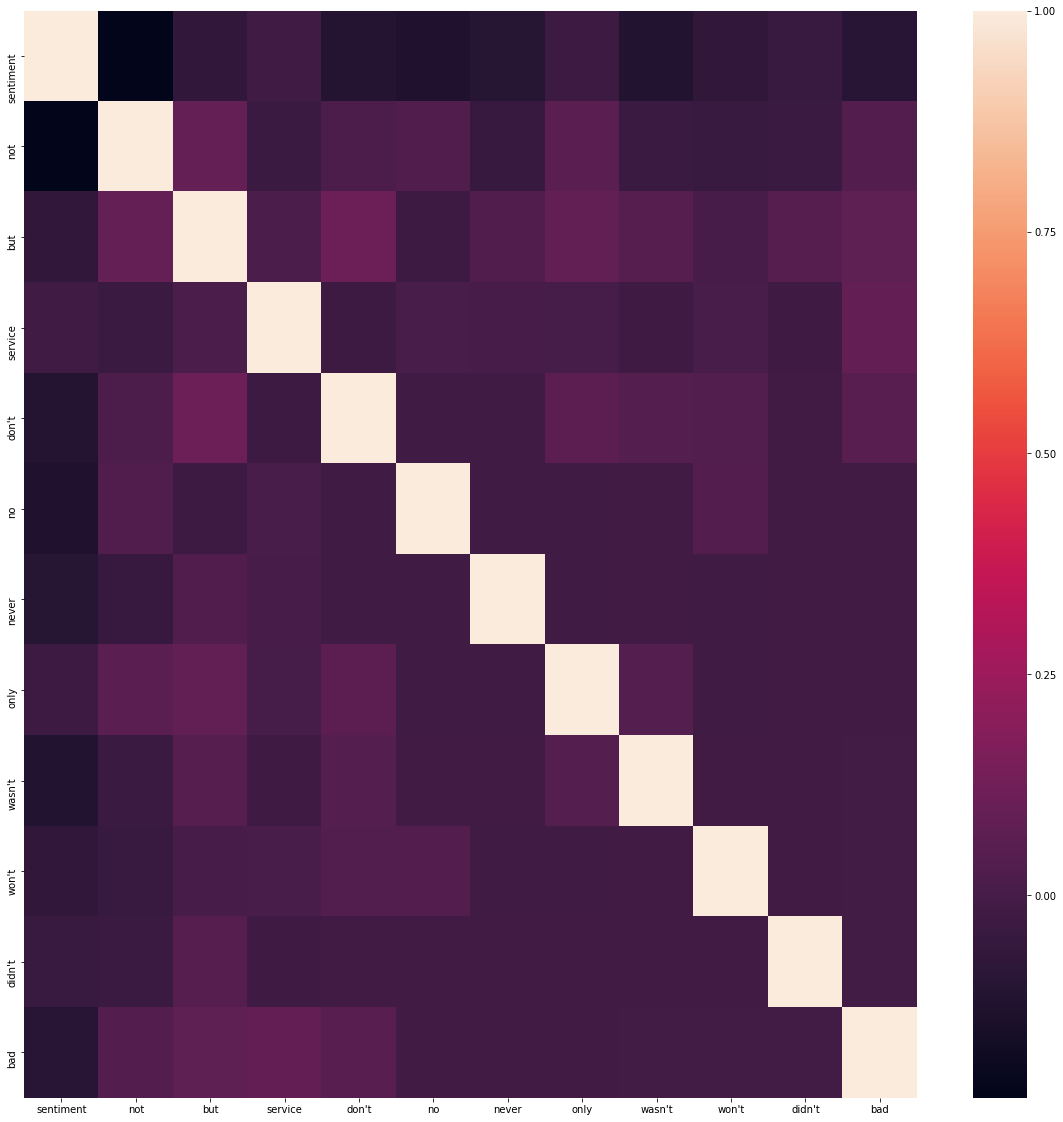

In [61]:
plt.figure(figsize=(20, 20))
sns.heatmap(yelp_raw.corr())

In [62]:
data = yelp_raw[keywords]
target = yelp_raw['sentiment']

In [63]:
# Data is boolean, so we will use a Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
# Instantiate model and store in a new variable.
bnb = BernoulliNB()
gnb = GaussianNB()
mnb = MultinomialNB()
# Fit our model to the data.
bnb.fit(data, target)
gnb.fit(data, target)
mnb.fit(data, target)
# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)
y2_pred = gnb.predict(data)
y3_pred = mnb.predict(data)
# Display results.
print("Number of negative reviews out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))
print("Number of negative reviews out of a total {} points : {}".format(
    data.shape[0],
    (target != y2_pred).sum()
))
print("Number of negative reviews out of a total {} points : {}".format(
    data.shape[0],
    (target != y3_pred).sum()
))

Number of negative reviews out of a total 1000 points : 354
Number of negative reviews out of a total 1000 points : 420
Number of negative reviews out of a total 1000 points : 520


In [64]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[198, 302],
       [ 52, 448]])

In [65]:
from sklearn.model_selection import train_test_split
# Use train_test_split to create the necessary training and test groups
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.615
Testing on Sample: 0.646


In [66]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.68, 0.63, 0.7 , 0.56, 0.6 , 0.62, 0.67, 0.63, 0.64, 0.64])